<a href="https://colab.research.google.com/github/anilsah895/image_preprocessing/blob/master/Image_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

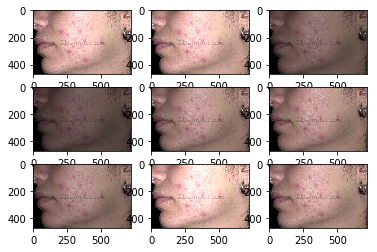

In [0]:
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('acne-cystic-20.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(brightness_range=[1.5,.50])
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

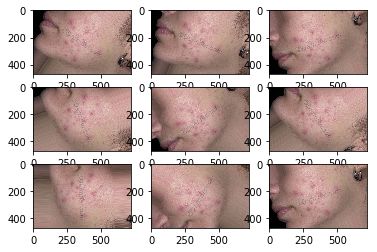

In [0]:

# example of random rotation image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('acne-cystic-20.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(rotation_range=90)
# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next()
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')
	# plot raw pixel data
	pyplot.imshow(image)
# show the figure
pyplot.show()

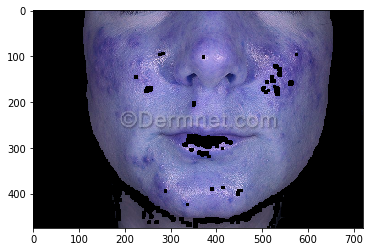

In [0]:
import cv2
import numpy as np
from cv2 import cvtColor
import os
image=cv2.imread('acne-cystic-121.jpg')

HSV_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
YCbCr_image = cv2.cvtColor(image, cv2.COLOR_BGR2YCR_CB)
binary_mask_image = HSV_image
lower_HSV_values = np.array([0, 40, 0], dtype = "uint8")
upper_HSV_values = np.array([25, 255, 255], dtype = "uint8")

lower_YCbCr_values = np.array((0, 138, 67), dtype = "uint8")
upper_YCbCr_values = np.array((255, 173, 133), dtype = "uint8")

		#A binary mask is returned. White pixels (255) represent pixels that fall into the upper/lower.
mask_YCbCr = cv2.inRange(YCbCr_image, lower_YCbCr_values, upper_YCbCr_values)
mask_HSV = cv2.inRange(HSV_image, lower_HSV_values, upper_HSV_values) 

binary_mask_image = cv2.add(mask_HSV,mask_YCbCr)
		
image_foreground = cv2.erode(binary_mask_image,None,iterations = 3)     	#remove noise
dilated_binary_image = cv2.dilate(binary_mask_image,None,iterations = 3)   #The background region is reduced a little because of the dilate operation
ret,image_background = cv2.threshold(dilated_binary_image,1,128,cv2.THRESH_BINARY)  #set all background regions to 128

image_marker = cv2.add(image_foreground,image_background)   #add both foreground and backgroud, forming markers. The markers are "seeds" of the future image regions.
image_marker32 = np.int32(image_marker) #convert to 32SC1 format

cv2.watershed(image,image_marker32)
m = cv2.convertScaleAbs(image_marker32) #convert back to uint8 

		#bitwise of the mask with the input image
ret,image_mask = cv2.threshold(m,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
output = cv2.bitwise_and(image,image,mask = image_mask)
#masked = cv2.bitwise_or(image, image, mask=mask)
#pyplot.imshow(masked)
pyplot.imshow(output)
plt.savefig("masked.png", bbox_inches='tight')

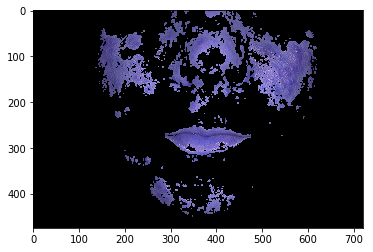

In [0]:
import cv2
import numpy as np
from cv2 import cvtColor
import os
image=cv2.imread('acne-cystic-121.jpg')
hsv=cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
hsvl = np.array([90, 100, 130],dtype = "uint8")
hsvh = np.array([255, 255, 255],dtype = "uint8")
skinMask = cv2.inRange(hsv, hsvl, hsvh)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11, 11))
mask = cv2.erode(skinMask, kernel, iterations = 2)
mask = cv2.dilate(skinMask, kernel, iterations = 2)
mask = cv2.GaussianBlur(skinMask, (3, 3), 0)
skin = cv2.bitwise_and(image, image, mask = mask)
#masked = cv2.bitwise_or(image, image, mask=mask)
#pyplot.imshow(masked)
pyplot.imshow(skin)
plt.savefig("masked.png", bbox_inches='tight')

In [0]:
import cv2
import numpy as np

#Open a simple image
img=cv2.imread("acne-cystic-121.jpg")

#converting from gbr to hsv color space
img_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#skin color range for hsv color space 
HSV_mask = cv2.inRange(img_HSV, (0, 15, 0), (17,170,255)) 
HSV_mask = cv2.morphologyEx(HSV_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#converting from gbr to YCbCr color space
img_YCrCb = cv2.cvtColor(img, cv2.COLOR_BGR2YCrCb)
#skin color range for hsv color space 
YCrCb_mask = cv2.inRange(img_YCrCb, (0, 135, 85), (255,180,135)) 
YCrCb_mask = cv2.morphologyEx(YCrCb_mask, cv2.MORPH_OPEN, np.ones((3,3), np.uint8))

#merge skin detection (YCbCr and hsv)
global_mask=cv2.bitwise_and(YCrCb_mask,HSV_mask)
global_mask=cv2.medianBlur(global_mask,3)
global_mask = cv2.morphologyEx(global_mask, cv2.MORPH_OPEN, np.ones((4,4), np.uint8))


HSV_result = cv2.bitwise_not(HSV_mask)
YCrCb_result = cv2.bitwise_not(YCrCb_mask)
global_result=cv2.bitwise_not(global_mask)


#show results
# cv2.imshow("1_HSV.jpg",HSV_result)
# cv2.imshow("2_YCbCr.jpg",YCrCb_result)
# cv2.imshow("3_global_result.jpg",global_result)
# cv2.imshow("Image.jpg",img)
cv2.imwrite("1_HSV.jpg",HSV_result)
cv2.imwrite("2_YCbCr.jpg",YCrCb_result)
cv2.imwrite("3_global_result.jpg",global_result)
 

True

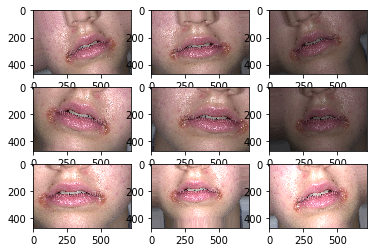

In [0]:
import matplotlib.pyplot as plt
# example of horizontal flip image augmentation
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot
# load the image
img = load_img('07PerlecheAccutane.jpg')
# convert to numpy array
data = img_to_array(img)
# expand dimension to one sample
samples = expand_dims(data, 0)
# create image data augmentation generator
datagen = ImageDataGenerator(
                             #zca_epsilon=1e-06,
                             zoom_range=0.2,
                             rotation_range=20,
                             height_shift_range=.1,
                             width_shift_range=.1,                           
                             brightness_range=[1.5,.60],
                             horizontal_flip=True,
                             fill_mode='nearest',
                             shear_range=0.2)
                             
    

# prepare iterator
it = datagen.flow(samples, batch_size=1)
# generate samples and plot
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# generate batch of images
	batch = it.next( )
	# convert to unsigned integers for viewing
	image = batch[0].astype('uint8')

	# plot raw pixel data
	pyplot.imshow(image)
 
# show the figure
#plt.figure(figsize=[10,8])
plt.savefig("Augmentedimage.png", bbox_inches='tight')
#pyplot.show()

In [0]:
import cv2
import os,glob
from os import listdir,makedirs
from os.path import isfile,join
path = 'Anil' # Source Folder
dstpath = 'Anil2' # Destination Folder
try:
    makedirs(dstpath)
except:
    print ("Directory already exist, images will be written in same folder")
# Folder won't used
files = [f for f in listdir(path) if isfile(join(path,f))] 
for image in files:
    try:
        img = cv2.imread(os.path.join(path,image))
        gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        dstPath = join(dstpath,image)
        cv2.imwrite(dstPath,gray)
    except:
        print ("{} is not converted".format(image))
for fil in glob.glob("*.jpg"):
    try:
        image = cv2.imread(fil) 
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # convert to greyscale
        cv2.imwrite(os.path.join(dstpath,fil),gray_image)
    except:
        print('{} is not converted')

In [0]:
import logging
import cv2
import numpy




def get_hsv_mask(img, debug=False):
    assert isinstance(img, numpy.ndarray), 'image must be a numpy array'
    assert img.ndim == 3, 'skin detection can only work on color images'
    logger.debug('getting hsv mask')

    lower_thresh = numpy.array([0, 50, 0], dtype=numpy.uint8)
    upper_thresh = numpy.array([120, 150, 255], dtype=numpy.uint8)
    img_hsv = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
    msk_hsv = cv2.inRange(img_hsv, lower_thresh, upper_thresh)

    msk_hsv[msk_hsv < 128] = 0
    msk_hsv[msk_hsv >= 128] = 1

    
    return msk_hsv.astype(float)


def get_rgb_mask(img, debug=False):
    assert isinstance(img, numpy.ndarray), 'image must be a numpy array'
    assert img.ndim == 3, 'skin detection can only work on color images'
    logger.debug('getting rgb mask')

    lower_thresh = numpy.array([45, 52, 108], dtype=numpy.uint8)
    upper_thresh = numpy.array([255, 255, 255], dtype=numpy.uint8)

    mask_a = cv2.inRange(img, lower_thresh, upper_thresh)
    mask_b = 255 * ((img[:, :, 2] - img[:, :, 1]) / 20)
    mask_c = 255 * ((numpy.max(img, axis=2) - numpy.min(img, axis=2)) / 20)
    # msk_rgb = cv2.bitwise_and(mask_c, cv2.bitwise_and(mask_a, mask_b))
    mask_d = numpy.bitwise_and(numpy.uint64(mask_a), numpy.uint64(mask_b))
    msk_rgb = numpy.bitwise_and(numpy.uint64(mask_c), numpy.uint64(mask_d))

    msk_rgb[msk_rgb < 128] = 0
    msk_rgb[msk_rgb >= 128] = 1

    if debug:
        scripts.display('input', img)
        scripts.display('mask_rgb', msk_rgb)

    return msk_rgb.astype(float)


def get_ycrcb_mask(img, debug=False):
    assert isinstance(img, numpy.ndarray), 'image must be a numpy array'
    assert img.ndim == 3, 'skin detection can only work on color images'
    logger.debug('getting ycrcb mask')

    lower_thresh = numpy.array([90, 100, 130], dtype=numpy.uint8)
    upper_thresh = numpy.array([230, 120, 180], dtype=numpy.uint8)

    img_ycrcb = cv2.cvtColor(img, cv2.COLOR_RGB2YCR_CB)
    msk_ycrcb = cv2.inRange(img_ycrcb, lower_thresh, upper_thresh)

    msk_ycrcb[msk_ycrcb < 128] = 0
    msk_ycrcb[msk_ycrcb >= 128] = 1

    if debug:
        scripts.display('input', img)
        scripts.display('mask_ycrcb', msk_ycrcb)

    return msk_ycrcb.astype(float)


def grab_cut_mask(img_col, mask, debug=False):
    assert isinstance(img_col, numpy.ndarray), 'image must be a numpy array'
    assert isinstance(mask, numpy.ndarray), 'mask must be a numpy array'
    assert img_col.ndim == 3, 'skin detection can only work on color images'
    assert mask.ndim == 2, 'mask must be 2D'

    kernel = numpy.ones((50, 50), numpy.float32) / (50 * 50)
    dst = cv2.filter2D(mask, -1, kernel)
    dst[dst != 0] = 255
    free = numpy.array(cv2.bitwise_not(dst), dtype=numpy.uint8)

    if debug:
        scripts.display('not skin', free)
        scripts.display('grabcut input', mask)

    grab_mask = numpy.zeros(mask.shape, dtype=numpy.uint8)
    grab_mask[:, :] = 2
    grab_mask[mask == 255] = 1
    grab_mask[free == 255] = 0

    if numpy.unique(grab_mask).tolist() == [0, 1]:
        logger.debug('conducting grabcut')
        bgdModel = numpy.zeros((1, 65), numpy.float64)
        fgdModel = numpy.zeros((1, 65), numpy.float64)

        if img_col.size != 0:
            mask, bgdModel, fgdModel = cv2.grabCut(img_col, grab_mask, None, bgdModel, fgdModel, 5,
                                                   cv2.GC_INIT_WITH_MASK)
            mask = numpy.where((mask == 2) | (mask == 0), 0, 1).astype(numpy.uint8)
        else:
            logger.warning('img_col is empty')

    return mask


def closing(mask):
    assert isinstance(mask, numpy.ndarray), 'mask must be a numpy array'
    assert mask.ndim == 2, 'mask must be a greyscale image'
    logger.debug("closing mask of shape {0}".format(mask.shape))

    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (3, 3))
    mask = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel, iterations=2)

    return mask


def process(img, thresh=0.5, debug=False):
    assert isinstance(img, numpy.ndarray), 'image must be a numpy array'
    assert img.ndim == 3, 'skin detection can only work on color images'
    logger.debug("processing image of shape {0}".format(img.shape))

    mask_hsv = get_hsv_mask(img, debug=debug)
    mask_rgb = get_rgb_mask(img, debug=debug)
    mask_ycrcb = get_ycrcb_mask(img, debug=debug)

    n_masks = 3.0
    mask = (mask_hsv + mask_rgb + mask_ycrcb) / n_masks

    mask[mask < thresh] = 0.0
    mask[mask >= thresh] = 255.0
    logger.debug('{0}% of the image is skin'.format(int((100.0 / 255.0) * numpy.sum(mask) / mask.size)))

    mask = mask.astype(numpy.uint8)

    mask = closing(mask)
    mask = grab_cut_mask(img, mask, debug=debug)

    return mask

In [0]:
!make install 

make: *** No rule to make target 'install'.  Stop.


In [0]:
import skin_detector

ModuleNotFoundError: ignored